### 3.5.4 出力層のニューロンの数

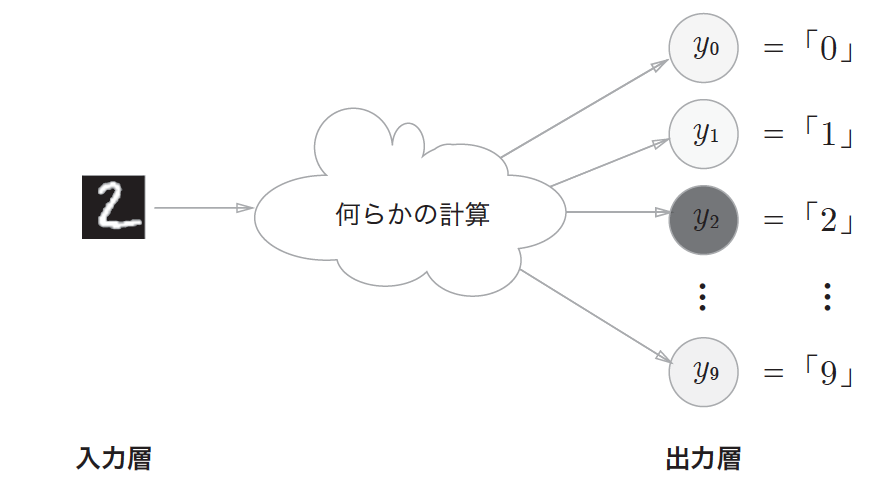

## 3.6 手書き数字認識

参考URL
https://qiita.com/python_walker/items/e4d2ae5b7196cb07402b

### 3.6.1 MNISTデータセット

In [1]:
import urllib.request # URLを扱うためのモジュール

url_base = 'http://yann.lecun.com/exdb/mnist/'

key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

import os
working_directory=os.getcwd() # Pythonが実行されている作業ディレクトリの取得(get current working directory)
dataset_dir = working_directory  # 作業ディレクトリを下記でダウンロードするデータセットの格納先パスとして保存

In [2]:
# for v in key_file.values():
#     print(f'Data→{v}')
#     file_path = dataset_dir + '/' + v
#     urllib.request.urlretrieve(url_base + v, file_path)

In [3]:
for k in key_file.keys():
    v=key_file[k]
    print(f'{k}  : {v}')
    file_path = dataset_dir + '/' + v #ダウンロードするファイルのデータセット
    urllib.request.urlretrieve(url_base + v, file_path) # Web上のファイルのダウンロード

train_img  : train-images-idx3-ubyte.gz
train_label  : train-labels-idx1-ubyte.gz
test_img  : t10k-images-idx3-ubyte.gz
test_label  : t10k-labels-idx1-ubyte.gz


◆ MNISTデータの仕様<br>
https://weblabo.oscasierra.net/python/ai-mnist-data-detail.html

■画像データ

<p>　画像データが保存されたファイル(train-images-idx3-ubyte / t10k-images-idx3-ubyte)は、次のような仕様になっています。</p>
<table>
<thead><tr>
<th style="text-align:left">offset</th>
<th style="text-align:left">type</th>
<th style="text-align:left">value</th>
<th style="text-align:left">description</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left">0000</td>
<td style="text-align:left">32 bit integer</td>
<td style="text-align:left">0x00000803(2051)</td>
<td style="text-align:left">識別子(定数)</td>
</tr>
<tr>
<td style="text-align:left">0004</td>
<td style="text-align:left">32 bit integer</td>
<td style="text-align:left">60000</td>
<td style="text-align:left">画像データの数</td>
</tr>
<tr>
<td style="text-align:left">0008</td>
<td style="text-align:left">32 bit integer</td>
<td style="text-align:left">28</td>
<td style="text-align:left">1画像あたりのデータ行数</td>
</tr>
<tr>
<td style="text-align:left">0012</td>
<td style="text-align:left">32 bit integer</td>
<td style="text-align:left">28</td>
<td style="text-align:left">1画像あたりのデータ列数</td>
</tr>
<tr>
<td style="text-align:left">0016</td>
<td style="text-align:left">unsigned byte</td>
<td style="text-align:left">0 ～ 255</td>
<td style="text-align:left">1つめの画像の1ピクセル目の値</td>
</tr>
<tr>
<td style="text-align:left">0017</td>
<td style="text-align:left">unsigned byte</td>
<td style="text-align:left">0 ～ 255</td>
<td style="text-align:left">1つめの画像の2ピクセル目の値</td>
</tr>
<tr>
<td style="text-align:left">....</td>
<td style="text-align:left">....</td>
<td style="text-align:left">....</td>
<td style="text-align:left">....</td>
</tr>
<tr>
<td style="text-align:left">xxxx</td>
<td style="text-align:left">unsigned byte</td>
<td style="text-align:left">0 ～ 255</td>
<td style="text-align:left">最後の画像の784ピクセル目の値</td>
</tr>
</tbody>
</table>
<p>ピクセルの値は、0 から 255 までの値で、0 が白を, 255 が黒を表します。</p>



8ビットカラー 【8-bit color】 256色 (2の8乗) <br>
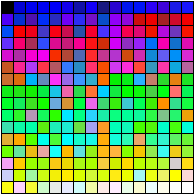

https://atmarkit.itmedia.co.jp/ait/articles/2001/22/news012.html <br>
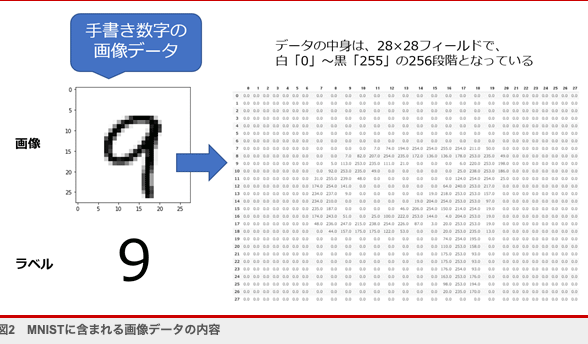

In [4]:
#試しにtrain_imgを見てみる
import gzip
import numpy as np

file_path = dataset_dir +  '/' + key_file['train_img']

with gzip.open(file_path, 'rb') as f: #バイナリモードで読み込み
    data_no_offset = np.frombuffer(f.read(), np.uint8) # https://stackoverflow.com/questions/22236749/numpy-what-is-the-difference-between-frombuffer-and-fromstring
    

with gzip.open(file_path, 'rb') as f: #バイナリモードで読み込み
    data = np.frombuffer(f.read(), np.uint8, offset=16) # https://stackoverflow.com/questions/22236749/numpy-what-is-the-difference-between-frombuffer-and-fromstring


print(f'想定されるtrain個数(28×28×60000) : {(28**2)*60000}\n')
print(f'実際の個数 : {len(data_no_offset)}　⇦ 想定よりも16個数が多い。恐らくヘッダーの情報をはじめの16つに含んでいるため?\n')
print(f'offset:16を設定 : {len(data)}　\n')
print(f'中身 : {data}\n')
print(f'中身の最大値 : {np.max(data_no_offset)}\n')
print(f'中身の最小値 : {np.max(data_no_offset)}\n')
print(f'型   : {data.dtype}\n')
print(f'次元 : {len(data.shape)}\n')

想定されるtrain個数(28×28×60000) : 47040000

実際の個数 : 47040016　⇦ 想定よりも16個数が多い。恐らくヘッダーの情報をはじめの16つに含んでいるため?

offset:16を設定 : 47040000　

中身 : [0 0 0 ... 0 0 0]

中身の最大値 : 255

中身の最小値 : 255

型   : uint8

次元 : 1



In [5]:
# dtypeにunit8を使った時の挙動確認
np_sample = np.array([0,1, 100,255,256,257,-1,-2], dtype='uint8')
np_sample

array([  0,   1, 100, 255,   0,   1, 255, 254], dtype=uint8)

■ラベルデータ

ラベルデータが保存されたファイル(train-labels-idx1-ubyte / t10k-labels-idx1-ubyte)は、次のような仕様になっています。</p>
<table>
<thead><tr>
<th style="text-align:left">offset</th>
<th style="text-align:left">type</th>
<th style="text-align:left">value</th>
<th style="text-align:left">description</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left">0000</td>
<td style="text-align:left">32 bit integer</td>
<td style="text-align:left">0x00000801(2049)</td>
<td style="text-align:left">識別子(定数)</td>
</tr>
<tr>
<td style="text-align:left">0004</td>
<td style="text-align:left">32 bit integer</td>
<td style="text-align:left">60000 or 10000</td>
<td style="text-align:left">ラベルデータの数</td>
</tr>
<tr>
<td style="text-align:left">0008</td>
<td style="text-align:left">unsigned byte</td>
<td style="text-align:left">0 ～ 9</td>
<td style="text-align:left">1つ目のデータのラベル</td>
</tr>
<tr>
<td style="text-align:left">0009</td>
<td style="text-align:left">unsigned byte</td>
<td style="text-align:left">0 ～ 9</td>
<td style="text-align:left">2つ目のデータのラベル</td>
</tr>
<tr>
<td style="text-align:left">....</td>
<td style="text-align:left">....</td>
<td style="text-align:left">....</td>
<td style="text-align:left">....</td>
</tr>
<tr>
<td style="text-align:left">xxxx</td>
<td style="text-align:left">unsigned byte</td>
<td style="text-align:left">0 ～ 9</td>
<td style="text-align:left">最後のデータのラベル</td>
</tr>
</tbody>
</table>

■データ読み込み

In [6]:
def load_img(file_name):
    file_path = dataset_dir + '/' + file_name
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 784)

    return data

def load_label(file_name):
    file_path = dataset_dir + '/' + file_name
    with gzip.open(file_path, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    return labels

dataset = {}
dataset['train_img'] = load_img(key_file['train_img'])
dataset['train_label'] = load_label(key_file['train_label'])
dataset['test_img'] = load_img(key_file['test_img'])
dataset['test_label'] = load_label(key_file['test_label'])

In [7]:
print(f'train_img次元  : {dataset["train_img"].shape}\n')
print(f'train_label次元  : {dataset["train_label"].shape}\n')
print(f'test_img次元  : {dataset["test_img"].shape}\n')
print(f'test_label次元  : {dataset["test_label"].shape}\n')

train_img次元  : (60000, 784)

train_label次元  : (60000,)

test_img次元  : (10000, 784)

test_label次元  : (10000,)



In [8]:
# pikle形式で保管
import pickle

save_file = dataset_dir + '/mnist.pkl'    #拡張子は.pkl
with open(save_file, 'wb') as f:
    pickle.dump(dataset, f, -1)    #-1は最も高いプロトコルバージョンで保存することを指定している

In [9]:
# 保存したデータの読み込み
with open(save_file, 'rb') as f:
    dataset = pickle.load(f)

In [10]:
dataset

{'train_img': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'train_label': array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 'test_img': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'test_label': array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)}

In [11]:
print(f'dataset[train_img] : {dataset["train_img"].shape}\n')
print(f'dataset[train_label] : {dataset["train_label"].shape}\n')

dataset[train_img] : (60000, 784)

dataset[train_label] : (60000,)



■画像データ



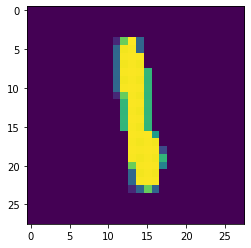

■正解データ(ラベル)

1



In [12]:
import matplotlib.pyplot as plt

# train画像データ順番
i=200

example = dataset['train_img'][i].reshape((28, 28))

print(f'■画像データ\n')
plt.imshow(example)
plt.show()

print(f'■正解データ(ラベル)\n')
print(f'{dataset["train_label"][i]}\n')

### 3.6.2 ニューラルネットワークの推論処理

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

In [14]:
def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み

    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか

    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
#     if not os.path.exists(save_file):
#         init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])

In [15]:
# coding: utf-8
import sys, os
# sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
# from dataset.mnist import load_mnist
# from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
#     (x_train, t_train), (x_test, t_test) = (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [16]:
network = init_network()

print(f'networkの設定概要(sample_weight.pkl)\n')
print(f'W1 : {network["W1"].shape}\n')
print(f'b1 : {network["b1"].shape}\n')
print(f'W2 : {network["W2"].shape}\n')
print(f'b2 : {network["b2"].shape}\n')
print(f'W3 : {network["W3"].shape}\n')
print(f'b3 : {network["b3"].shape}\n')

networkの設定概要(sample_weight.pkl)

W1 : (784, 50)

b1 : (50,)

W2 : (50, 100)

b2 : (100,)

W3 : (100, 10)

b3 : (10,)



ネットワークは、入力層を784 個、出力層を10 個のニュー
ロンで構成します。入力層の784 という数字は、画像サイズの28 × 28 = 784 から、
また、出力層の10 という数字は、10 クラス分類（数字の0 から9 の10 クラス）ら来ています。また、隠れ層が2 つあり、ひとつ目の隠れ層が50 個、2 つ目の層が
100 個のニューロンを持つものとします。この50 と100 という数字は、任意の値に
設定できます。それでは初めに、3 つの関数―― get_data()、init_network()、
predict()――を定義します（ここで示すコードはch03/neuralnet_mnist.py に
あります）。

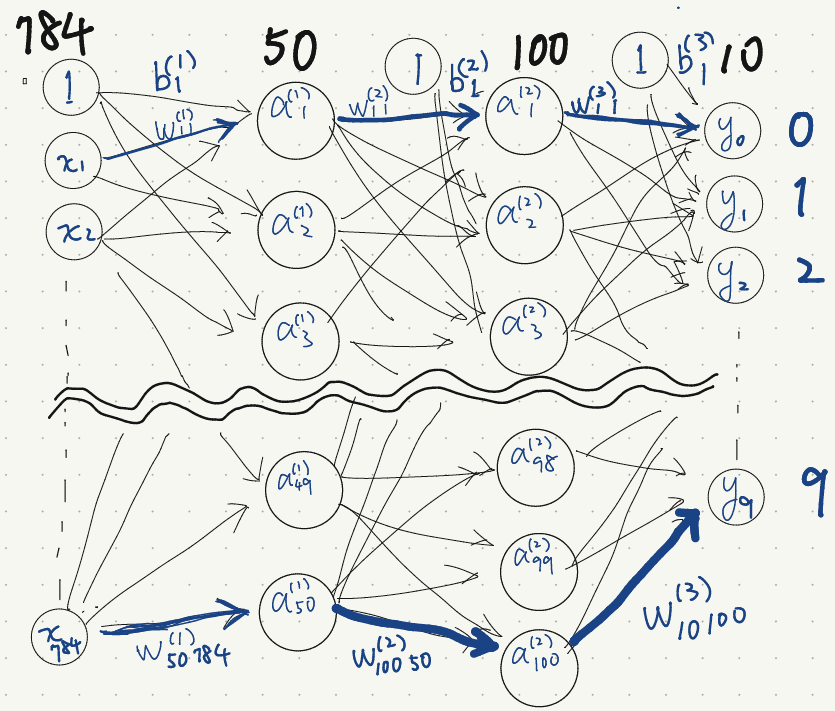

In [17]:
# network

In [18]:
x, t = get_data()

print(f'x : {np.shape(x)}\n')
print(f't : {np.shape(t)}\n')

x : (10000, 784)

t : (10000,)



In [19]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

In [20]:
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 3.6.3 バッチ処理

In [21]:
x,_=get_data()
network = init_network()

In [22]:
W1,W2,W3=network['W1'], network['W2'], network['W3']

In [23]:
print(f'x.shape : {x.shape}\n')
print(f'x[0].shape : {x[0].shape}\n')
print(f'W1.shape : {W1.shape}\n')
print(f'W2.shape : {W2.shape}\n')
print(f'W3.shape : {W3.shape}\n')

x.shape : (10000, 784)

x[0].shape : (784,)

W1.shape : (784, 50)

W2.shape : (50, 100)

W3.shape : (100, 10)



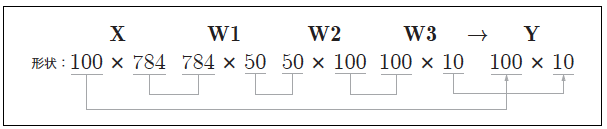

In [24]:
x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [33]:
# 抜粋
j=0
x_batch= x[j:j+batch_size]
y_batch = predict(network, x_batch)
print(f'x_batch.shape : {x_batch.shape}\n')
print(f'x_batch :\n {x_batch}\n')
print(f'y_batch.shape :\n {y_batch.shape}\n')

x_batch.shape : (100, 784)

x_batch :
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

y_batch.shape :
 (100, 10)



In [35]:
# y_batch

### 3.7 まとめ

本章では、ニューラルネットワークの順方向の伝播（forward propagation）につ
いて解説しました。本章で説明したニューラルネットワークは、前章のパーセプト
ロンと、ニューロンの信号が階層的に伝わるという点で同じでした。しかし、次の
ニューロンへ信号を送信する際に、信号を変化させる活性化関数に大きな違いがあり
ました。ニューラルネットワークでは活性化関数が滑らかに変化するシグモイド関
数、パーセプトロンでは信号が急に変化するステップ関数を使用しました。この違い
がニューラルネットワークの学習において重要になってきますが、これは次章で説明
します。